Recurrent Neural Network (RNN)

# Data Sampling

In [3]:
import pandas as pd
import numpy as np

In [4]:
#generate a data series with limit 30
dataseries=pd.Series(np.random.rand(30))

In [6]:
#look at first 5
dataseries.head()

0    0.643971
1    0.440669
2    0.414223
3    0.240424
4    0.727840
dtype: float64

In [10]:
#create a dataframe
## 4 columns, 50 rows, name columns
datawithfeatures = pd.DataFrame(np.random.randn(50,4), columns=list('TARS'))

#take a look at the first 5 rows
datawithfeatures.head()

,T,A,R,S
0,-0.533554,-0.104067,-0.477346,-0.657351
1,-0.698157,0.431270,0.882627,-0.320914
2,0.006240,0.116799,1.422803,-0.523466
3,1.425009,-0.228157,-0.449240,-0.283418
4,-0.500307,0.762716,-0.795830,0.098143


In [12]:
#create 4 samples
sampleseries = dataseries.sample(n=4)

#look at the sample
sampleseries

26    0.872216
27    0.499499
20    0.542493
7     0.163482
dtype: float64

In [14]:
#30% of data set
sampleseries1= dataseries.sample(frac=0.3, replace=True)

#look at sample series 1
sampleseries1

26    0.872216
26    0.872216
24    0.793023
8     0.350108
15    0.339541
8     0.350108
18    0.495007
23    0.909471
8     0.350108
dtype: float64

<hr style="border:2px solid black"> </hr>

# Applying PCA
- reducing dimensionality with Principle Component Analysis (PCA)
- one of the most popular unsupervised transformation techniques
    - facilitates the task of reducing dimensions
    - provides logical set of data on which we can apply machine learning algorithms
- finds direction of max variance and high dimensional data

### Strategy:
- standardize data

In [16]:
#imports
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler

In [17]:
#import iris dataset
iris = datasets.load_iris()

In [18]:
#save iris dataset to X variable
X = iris.data

In [19]:
#get shape of dataset
print(X.shape)

(150, 4)


In [22]:
#standardize data
X_std=StandardScaler().fit_transform(X)

In [23]:
#build covarient matrix
covmat = np.cov(X_std.T)

In [24]:
#take a look at covarient matrix
print(covmat)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [25]:
#perform eigan decomposition
eigval, eigvec = np.linalg.eig(covmat)

In [26]:
#look at eigan vector
print(eigvec)

[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [27]:
#look at eigan value
print(eigval)

[2.93808505 0.9201649  0.14774182 0.02085386]


In [31]:
#sort eigan values in decreasing order
eigpairs = [(np.abs(eigval[i]), eigvec[:,i]) for i in range
            (len(eigval))]

#find total by adding eigan values together
total= sum(eigval)

#cummulative variance
varexp=[(i/total)*100 for i in sorted(eigval, reverse=True)]

#take a look at result
print(varexp)

[72.96244541329985, 22.8507617867018, 3.668921889282875, 0.5178709107154843]


<hr style="border:2px solid black"> </hr>

# Gaussian Regression Process

Gaussian Process - infinate collection of random variables

In [38]:
import numpy as np
import matplotlib.pylab as plt

In [39]:
def exponential_cov(x,y, params):
    return params[0] * np.exp(-0.5 *params[1] *np.subtract.outer(x,y)**2)

In [40]:
def conditional(x_new, x,y,params):
    B = exponential_cov(x_new,x, params)
    C = exponential_cov(x, x, params)
    A = exponential_cov(x_new, x_new, params)
    
    mu = np.linalg.inv(C).dot(B.T).T.dot(y)
    sigma = A-B.dot(np.linalg.inv(C).dot(B.T))
    
    return(mu.squeeze(), sigma.squeeze())

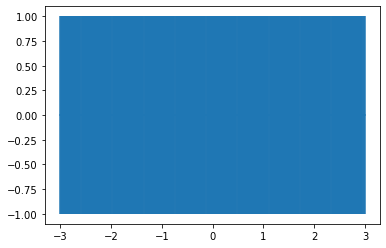

In [42]:
theta = [1,10]
theta_0 = exponential_cov(0,0,theta)
xpoints = np.arange(-3,3, step=0.01)
plt.errorbar(xpoints, np.zeros(len(xpoints)), yerr=theta_0, capsize=0)

x = [1.]
y= [np.random.normal(scale=theta_0)]

<hr style="border:2px solid black"> </hr>

# Logistic Regression